# IDL TP Final `scikit-learn`

## Un Premier Exemple

### Les données

In [1]:
from sklearn import datasets
wine = datasets.load_wine()
type(wine)

sklearn.utils._bunch.Bunch

In [2]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
import pandas as pd

In [6]:
wine_data_structure = {
	"Type": type(wine),
	"Keys": wine.keys(),
	"Feature names": wine.feature_names,
	"Target names": wine.target_names,
	"Number of samples": wine.data.shape[0],
	"Number of features": wine.data.shape[1],
	"Sample data point": wine.data[0],
	"Sample target": wine.target[0]
}

In [7]:
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

In [8]:
wine_data_structure, df_wine.head()

({'Type': sklearn.utils._bunch.Bunch,
  'Keys': dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']),
  'Feature names': ['alcohol',
   'malic_acid',
   'ash',
   'alcalinity_of_ash',
   'magnesium',
   'total_phenols',
   'flavanoids',
   'nonflavanoid_phenols',
   'proanthocyanins',
   'color_intensity',
   'hue',
   'od280/od315_of_diluted_wines',
   'proline'],
  'Target names': array(['class_0', 'class_1', 'class_2'], dtype='<U7'),
  'Number of samples': 178,
  'Number of features': 13,
  'Sample data point': array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
         3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
         1.065e+03]),
  'Sample target': 0},
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0    14.23        1.71  2.43               15.6      127.0           2.80   
 1    13.20        1.78  2.14               11.2      100.0           2.65   
 2    13.16        2.36  

In [9]:
import polars as pl

In [10]:
df = pl.DataFrame(
	data=wine.data, schema=wine.feature_names).with_columns(
	target=pl.Series(wine.target)
)
df.head()

alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
13.2,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050.0,0
13.16,2.36,2.67,18.6,101.0,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185.0,0
14.37,1.95,2.5,16.8,113.0,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480.0,0
13.24,2.59,2.87,21.0,118.0,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
X_wine, y_wine = wine.data, wine.target

In [12]:
X_wine.shape

(178, 13)

In [13]:
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3)
y_train

array([1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0,
       2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 1, 0,
       1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1])

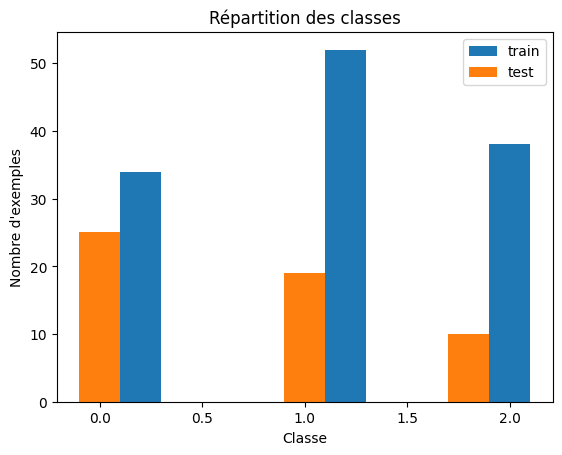

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_train, align="right", label="train") 
plt.hist(y_test, align="left", label="test")
plt.legend()
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.title("Répartition des classes") 
plt.show()

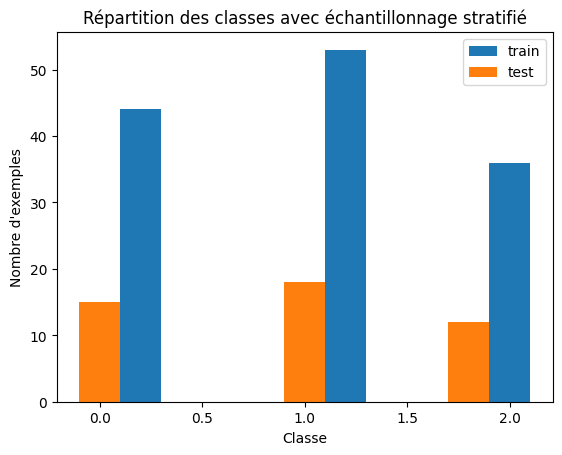

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.25, stratify=y_wine)
plt.hist(y_train, align="right", label="train") 
plt.hist(y_test, align="left", label="test") 
plt.legend()
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.title("Répartition des classes avec échantillonnage stratifié") 
plt.show()

### Visualisation de données

In [17]:
import seaborn as sns
print("Description statistique de base des caractéristiques :")
print(df_wine.describe())

Description statistique de base des caractéristiques :
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859   

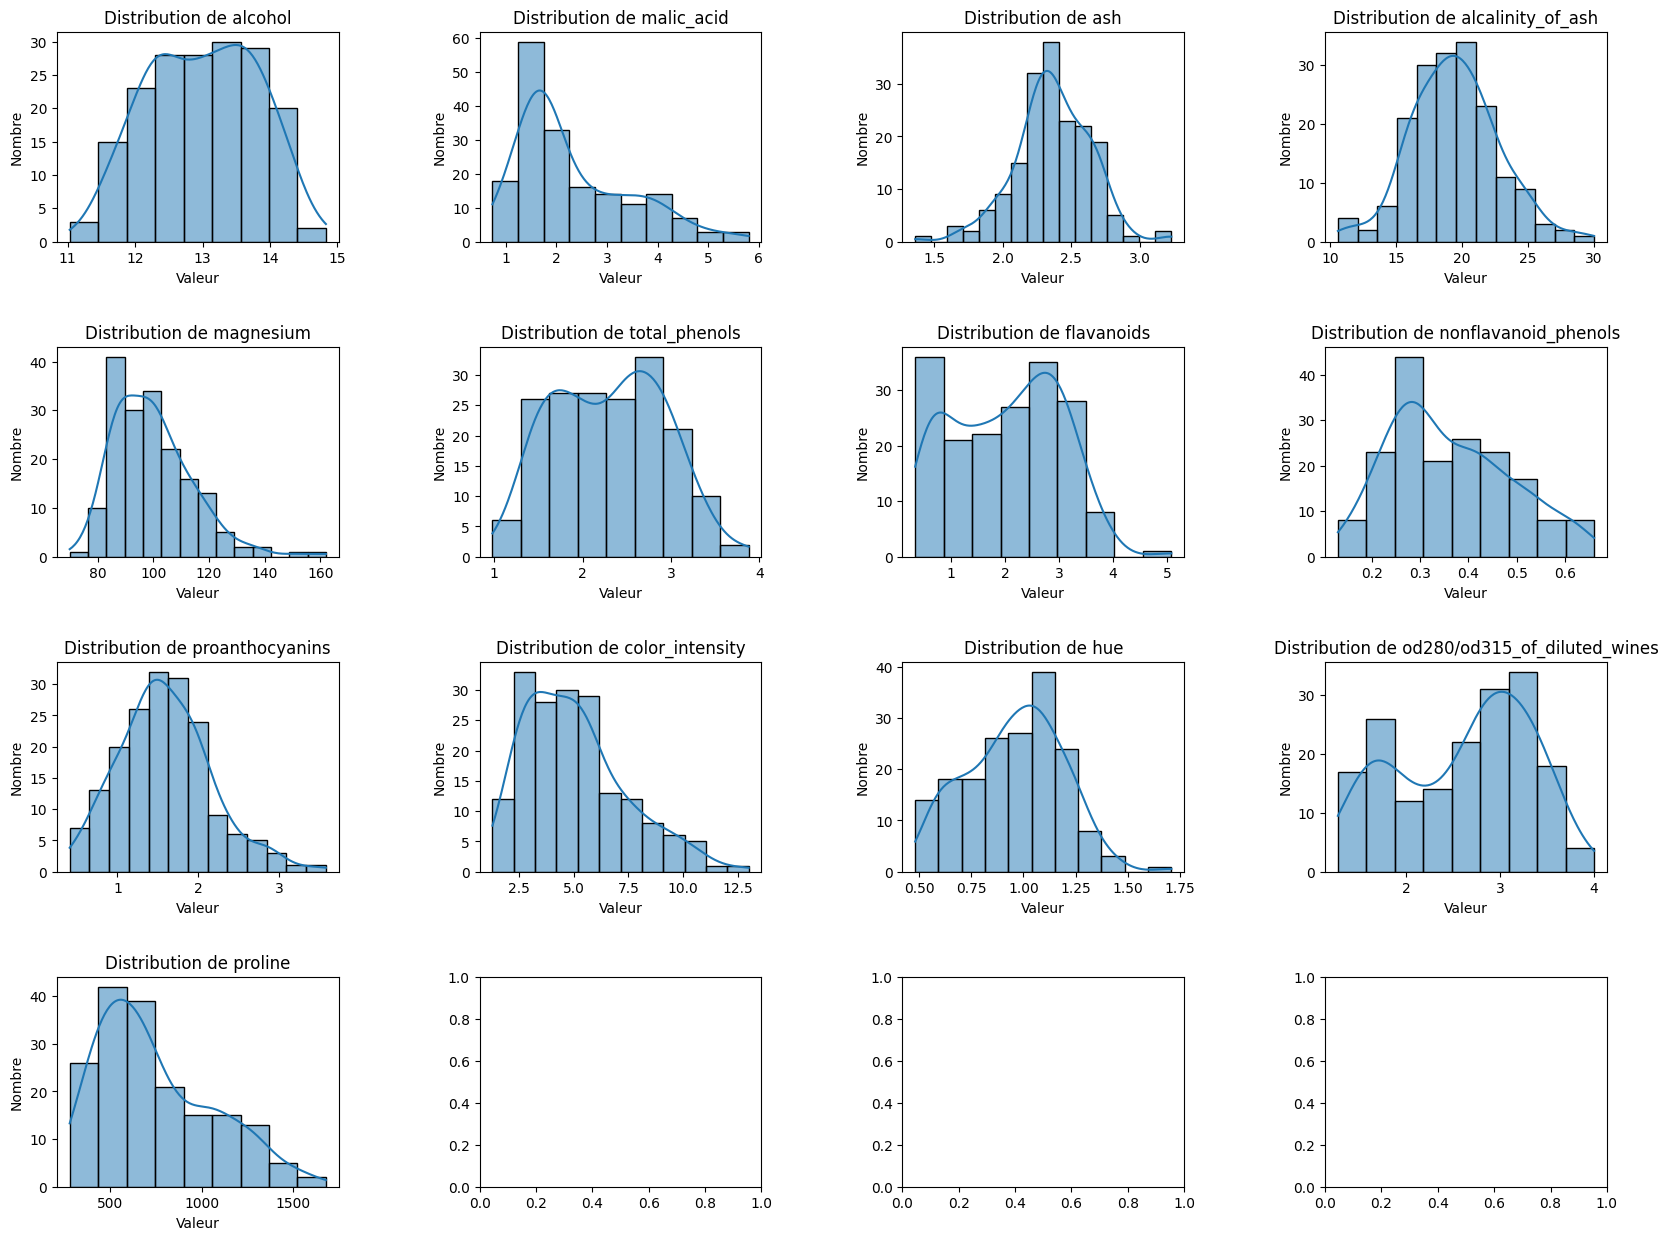

In [18]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.flatten()

for i, col in enumerate(df_wine.columns[:-1]):
	sns.histplot(df_wine[col], kde=True, ax=axs[i])
	axs[i].set_title(f'Distribution de {col}')
	axs[i].set_ylabel('Nombre')
	axs[i].set_xlabel('Valeur')

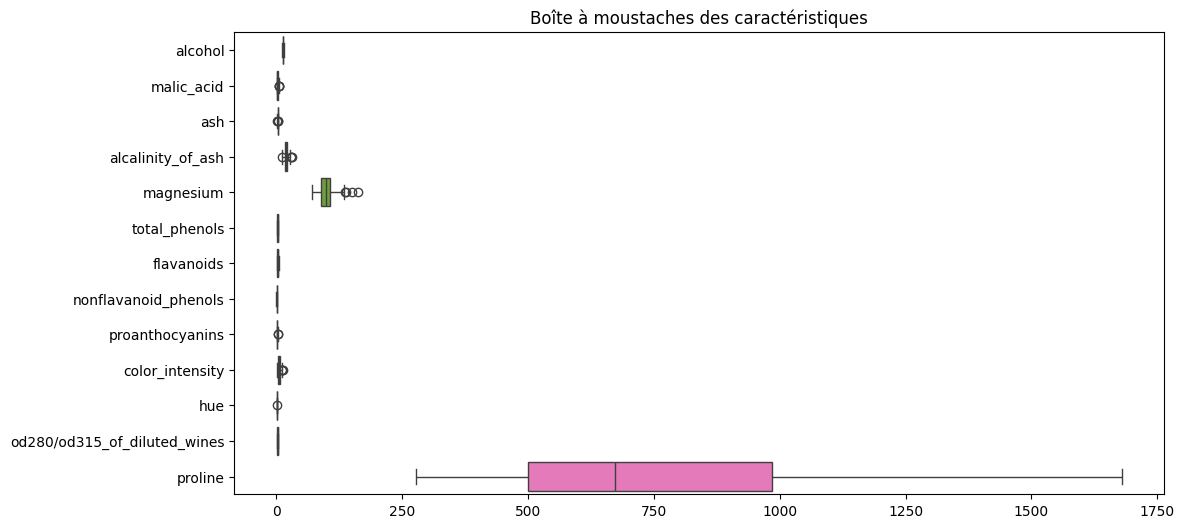

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_wine.drop(columns=['target']), orient='h')
plt.title('Boîte à moustaches des caractéristiques')
plt.show()

### Données Standardisées

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wine.drop(columns=['target']))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_wine['target'], test_size=0.3, random_state=42, stratify=df_wine['target'])

In [23]:
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}, Taille de l'ensemble de tests : {X_test.shape}")

Taille de l'ensemble d'entraînement : (124, 13), Taille de l'ensemble de tests : (54, 13)


## Entraînement

In [24]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
clf = LinearSVC(dual=True)
clf.fit(X_train, y_train)

LinearSVC(dual=True)

## Évaluation

In [26]:
y_pred = clf.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [30]:
print(f"Taux d'exactitude du modèle : {accuracy}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(class_report)

Taux d'exactitude du modèle : 0.9814814814814815
Matrice de confusion :
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [28]:
clf.score(X_test, y_test)

0.9814814814814815